In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [194]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [195]:
from sklearn.cross_validation import  train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [196]:
X1 = np.random.normal(3.5,1, size=[100, 2])

In [197]:
X2 =np.random.normal(1,1, size=[100, 2])

In [198]:
X = np.vstack([X1, X2])
Y = np.array([0 for i in range(X1.shape[0])]+[1 for i in range(X2.shape[0])])

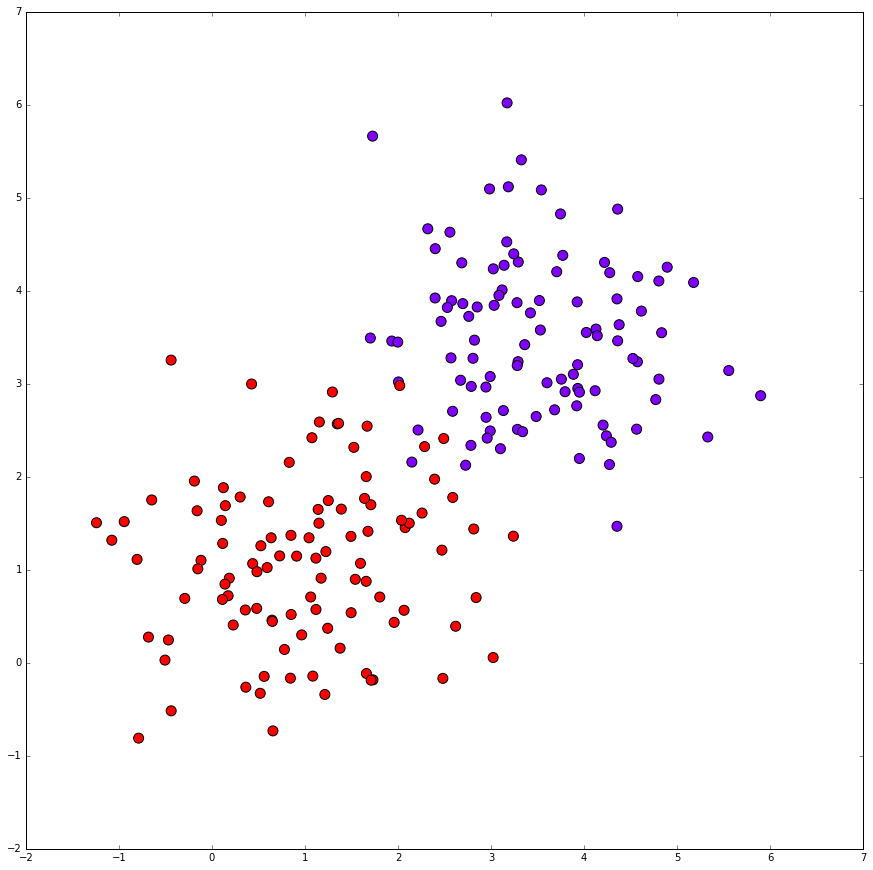

In [199]:
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],  c=Y, s=100, cmap='rainbow')
plt.show()

In [201]:
clf = LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
# line = np.vstack([clf.coef_,np.zeros(2),])

In [204]:
coef = clf.coef_
intercept = clf.intercept_
def line(x0): 
    return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]

In [205]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

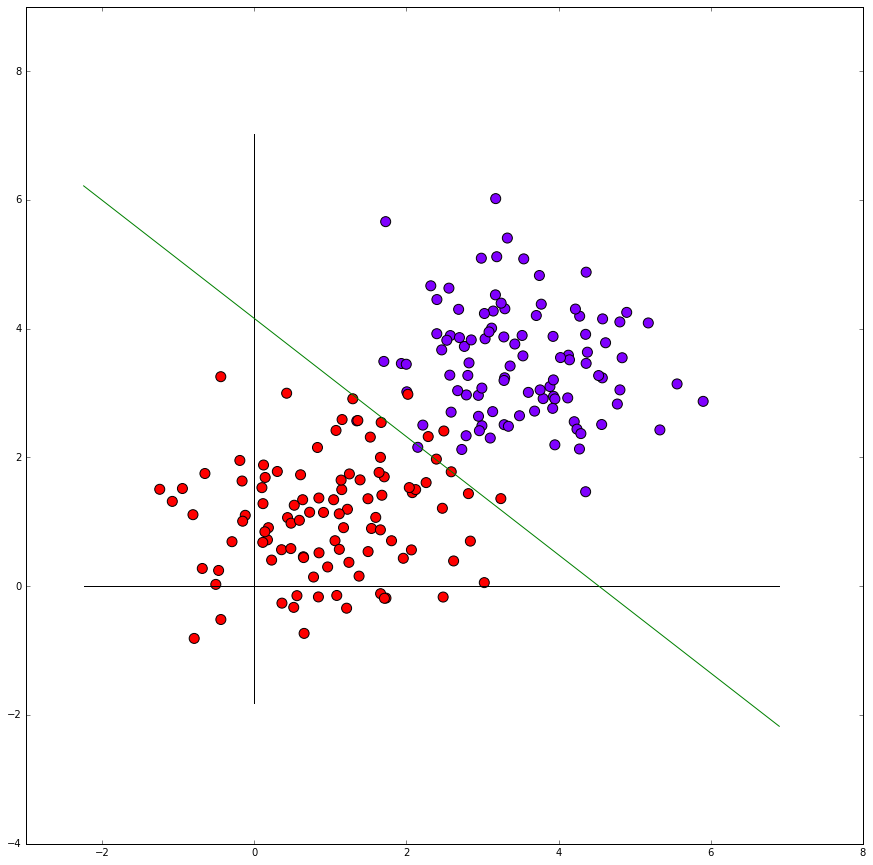

In [206]:
plt.figure(figsize=(15,15))
plt.xlim([-3,8])
plt.ylim([-4,9])
plt.plot([x_min,x_max],[0,0], c='black')
plt.plot([0,0],[y_min,y_max], c='black')
plt.scatter(X[:,0], X[:,1],  c=Y, s=100, cmap='rainbow')
plt.plot([x_min, x_max], [line(x_min), line(x_max)], c='green')
plt.show()

In [190]:
def plot_image_for_clf(clf, X_train, X_test, Y_train, Y_test):
    clf.fit(X_train, Y_train)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.figure(figsize=(15, 15))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('bwr'), alpha=0.2)
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, s=200, alpha=1, cmap='rainbow',marker='x')
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, s=200, alpha=0.5, cmap='rainbow', marker='o')

    Y_pred_proba = clf.predict_proba(X_test)
    Y_pred = Y_pred_proba.argmax(axis=1)
    
    print(roc_auc_score(y_true=Y_test, y_score=Y_pred_proba[:,1]))
    print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))
    print(classification_report(y_true=Y_test, y_pred=Y_pred))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5)

0.991185897436
[[52  0]
 [45  3]]
             precision    recall  f1-score   support

          0       0.54      1.00      0.70        52
          1       1.00      0.06      0.12        48

avg / total       0.76      0.55      0.42       100



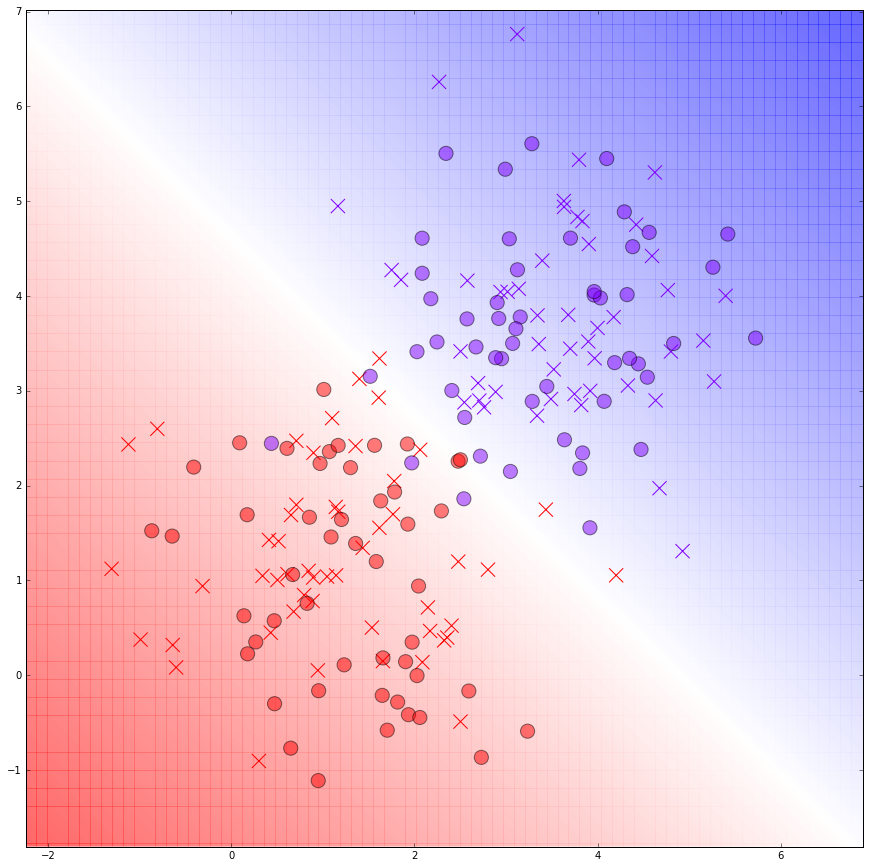

In [209]:
plot_image_for_clf(LogisticRegression(penalty='l2', C=0.001), X_train, X_test, Y_train, Y_test)